## Joseph Rochelle
## DSC 530 

In [1]:
## Adding libraries from ThinkStats 
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## 3-1 and 3-2

In [2]:
# Opening the Thinkstats data
resp = nsfg.ReadFemResp()

In [3]:
#Starting the distrubution of 'numkdhh'
pmf = thinkstats2.Pmf(resp.numkdhh, label='numkdhh')

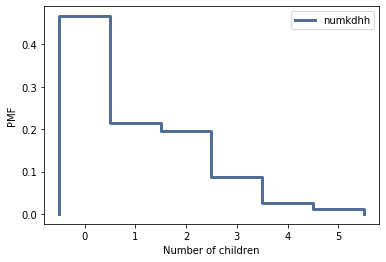

In [4]:
#Plotting pmf of 'numkdhh'

thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [7]:
## This funciton was used from the solutions that defined the BiasPMF. it takes the pmf items and multiples the count of x by count of x. 
## Just a reminder that PMF is not the best means to determine probilitlty 

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

In [8]:
# After plotting the distrbution we are going to look at what is bias2. Notice Bias label
biased = BiasPmf(pmf, label='biased')

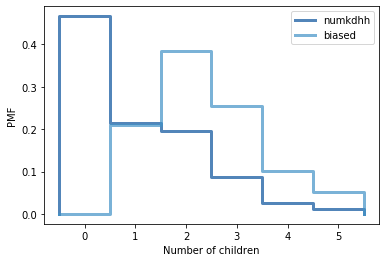

In [9]:

thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased])
thinkplot.Config(xlabel='Number of children', ylabel='PMF')

In [10]:
# After, we are able to compare the means of PMF and Bias PMF
pmf.Mean()

1.024205155043831

In [11]:
# this mean is 2x diffrent thatn the pmf value, meaning it would be statistically incorrect. 
biased.Mean()

2.403679100664282

In [12]:
#This now looks at the variance of the PMF object. 
pmf.Var()

1.4128643263531195

In [13]:
#This variance would throw off stats because the means would throw off the distrubition and the variance here are that
biased.Var()

1.1732721055059874

## 4-1 and 4-2

In [19]:
#loading data from solutions to look at my percentile of weight and then PMF vs CDF

live, firsts, others = first.MakeFrames()

In [27]:
# i went with Allen Downey's methods as the author used less code. Simply put the first object took the column from first.total_lb.
#We dropped blanks and repeated for others defined as second + babies. 

first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
#print('Firsts', len(first_wgt), len(first_wgt_dropna))
 
other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
#print('Others', len(other_wgt), len(other_wgt_dropna))

first_pmf = thinkstats2.Pmf(first_wgt_dropna, label='first')
other_pmf = thinkstats2.Pmf(other_wgt_dropna, label='other')

In [28]:
#This part of the lesson asks for our personal birth weight and if we are first or other line of babies. 
# i was the middle child so adding information. 
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='first')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')


In [30]:
# My weight as a child was in the 71% of other second + babies. 
other_cdf.PercentileRank(8)

71.12299465240642

In [24]:
# This section is to compare PMF and DCF. The first object is 1000 random numbers

t = np.random.random(1000)

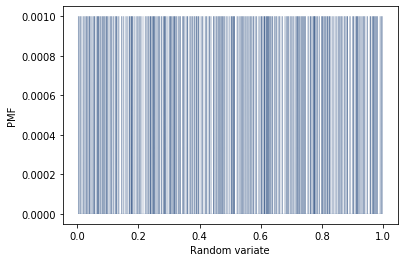

In [25]:
# This section takes the pmf function and then anchors to the 1000 random numbers we generated
# The graphing here was pretty cool because we are looking at 0 and 1s
# PMF is 1000 cases X 1000 cases for probability that essensially means its like a bar code. 
# There are only  2 chances each number

pmf = thinkstats2.Pmf(t)
thinkplot.Pmf(pmf, linewidth=0.1)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')

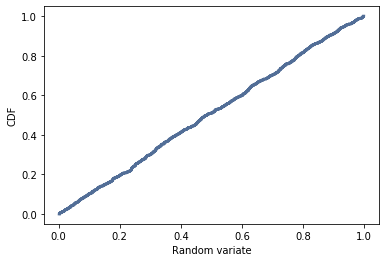

In [26]:
# The purpose of this solution is to show the difference in PMF to CDF. PMF is simply chances x chances
#CDF is the percentiles that have to equal 100. So we are actually seeing all 1000 numbers having partial chance by percent


cdf = thinkstats2.Cdf(t)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')